### Knock51: 決定木Model を構築しよう

In [1]:
# Data の読み込み
from sklearn.datasets import load_boston

boston = load_boston()

import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# 説明変数・目的変数の割合
X = df[boston.feature_names]
y = df[['MEDV']]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [3]:
# 訓練 Data・Test Data の分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape[0])
display(X_train.head())
print(X_test.shape[0])
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


決定木
`sklearn.DecisionTreeRegressor` Class を使用する。
※ 分類では `sklearn.DecisionTreeClassifier` を使用する。

In [4]:
# 決定木Model の構築
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train, y_train)
    # max_depth= ･･･ 決定木の層の深さの上限値を設定

[Text(775.0, 539.0, 'X[5] <= 6.797\nmse = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(387.5, 385.0, 'X[12] <= 14.405\nmse = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(193.75, 231.0, 'X[7] <= 1.474\nmse = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(96.875, 77.0, 'mse = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(290.625, 77.0, 'mse = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(581.25, 231.0, 'X[0] <= 5.782\nmse = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(484.375, 77.0, 'mse = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(678.125, 77.0, 'mse = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(1162.5, 385.0, 'X[5] <= 7.435\nmse = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(968.75, 231.0, 'X[0] <= 7.393\nmse = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(871.875, 77.0, 'mse = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(1065.625, 77.0, 'mse = 6.997\nsamples = 4\nvalue = 14.325'),
 Text(1356.25, 231.0, 'X[10] <= 18.3\nmse = 42.031\nsamples = 23\nvalue = 44.709'),
 Text(1259.37

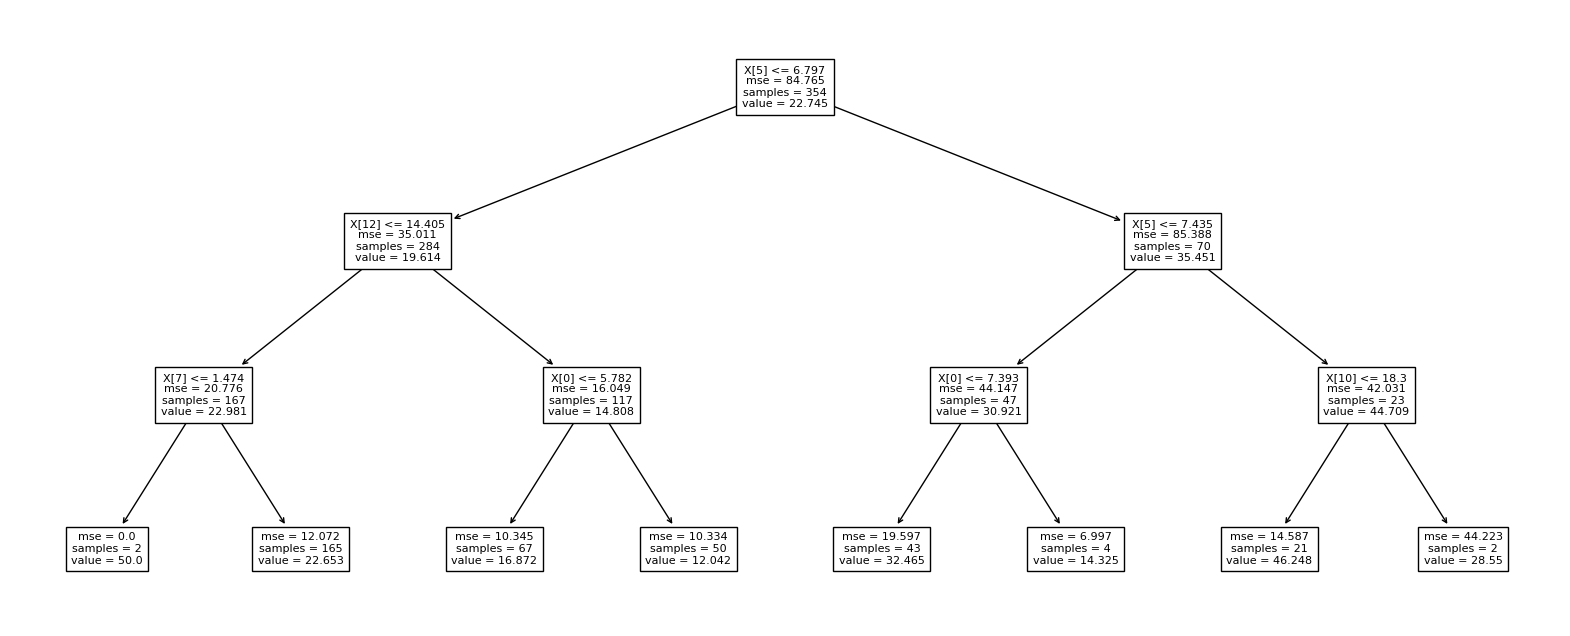

In [5]:
# Tree の表示
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
tree.plot_tree(tree_reg, fontsize=8)

#### 各 Node の中身
- X[n] <= m
    次の Node への条件分岐
- mse
    Node の不純度（value と実測値の平均二乗誤差）
- samples
    Node に含まれる Data 件数
- value
    Node に含まれる Data の平均値

### Knock52: 決定木Model を評価しよう
実測値と予測値との誤差の観点から評価を行なう。

In [6]:
# 予測値の算出（決定木Model）
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

import numpy as np

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

print(y_train_pred.shape[0])
print(y_train_pred[:5])
print(y_test_pred.shape[0])
print(y_test_pred[:5])

354
[[16.87164179]
 [22.65333333]
 [16.87164179]
 [22.65333333]
 [16.87164179]]
152
[[22.65333333]
 [50.        ]
 [22.65333333]
 [12.042     ]
 [22.65333333]]


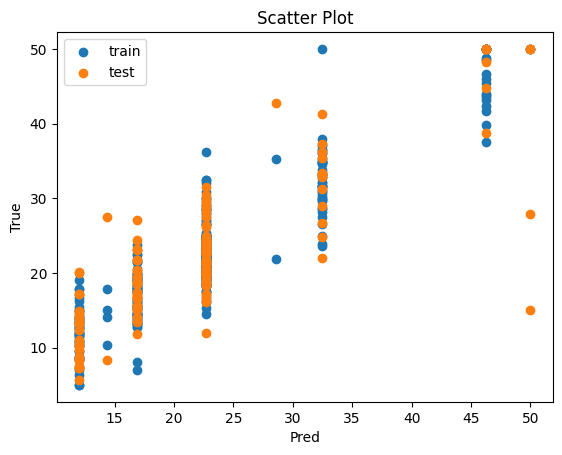

In [7]:
# 散布図（決定木Model）
plt.scatter(y_train_pred, y_train, label='train')
plt.scatter(y_test_pred, y_test, label='test')
plt.xlabel('Pred')
plt.ylabel('True')
plt.title('Scatter Plot')
plt.legend()
plt.show()

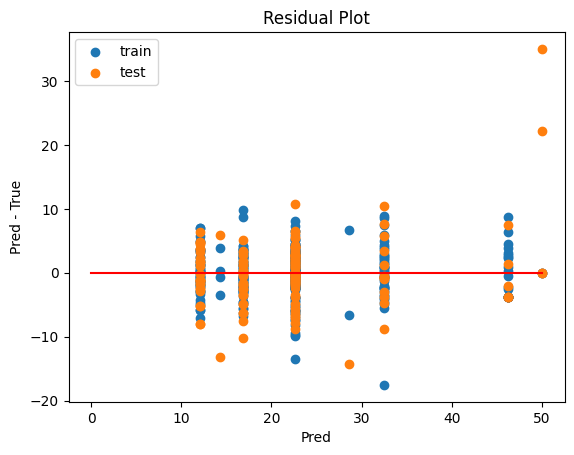

In [8]:
# 残差Plot（決定木Model）
def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, label='train')
    plt.scatter(y_test_pred, y_test_pred - y_test, label='test')
    plt.plot([0, 50], [0, 0], color='red')
    plt.xlabel('Pred')
    plt.ylabel('Pred - True')
    plt.title('Residual Plot')
    plt.legend()
    plt.show()


residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [9]:
# Score 算出（決定木Model）
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def get_eval_score(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_true, y_pred)

    print(f"    MAE: {mae}")
    print(f"    MSE: {mse}")
    print(f"    RMSE: {rmse}")
    print(f"    R2: {r2score}")


print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE: 2.7210334899446496
    MSE: 12.619014523843608
    RMSE: 3.552325227768934
    R2: 0.8511285677547421
Test Data Score
    MAE: 3.452910829225093
    MSE: 28.069857549754044
    RMSE: 5.298099428073622
    R2: 0.6628873063238391


### Knock53: 決定木の深さを変えてみよう
決定木の最大深さを定義する Hyper Parameter である `max_depth=` の値を調整することで深さを変えることができる。

In [10]:
# 決定木 Model 構築（max_depth=5）
tree_reg_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train, y_train)

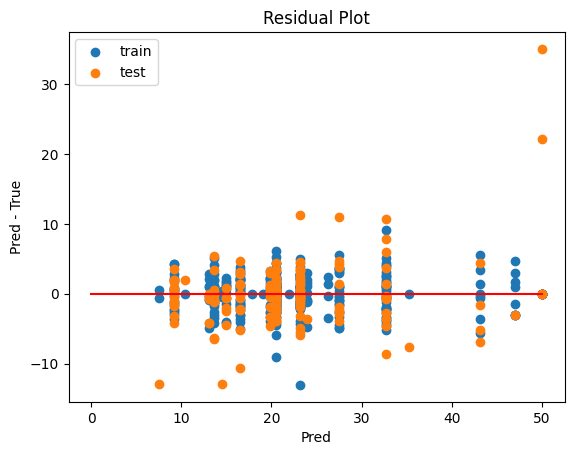

In [11]:
# 残差 Plot （決定木Model max_depth=5）
y_train_pred = tree_reg_depth_5.predict(X_train)
y_test_pred = tree_reg_depth_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [12]:
# Score 算出（決定木Model max_depth=5）
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE: 1.8784580945273341
    MSE: 6.077440143979722
    RMSE: 2.4652464671873524
    R2: 0.9283020701093933
Test Data Score
    MAE: 3.0192356439784844
    MSE: 24.917914785653885
    RMSE: 4.991784729498447
    R2: 0.700741432004224


決定木の深さを深くすれば、Model の表現力が上がる一方で、訓練 Data だけに過度に適合する過学習の Risk がある。

In [13]:
# 決定木Model 構築 (max_depth=20)
tree_reg_depth_20 = DecisionTreeRegressor(max_depth=20, random_state=0).fit(X_train, y_train)

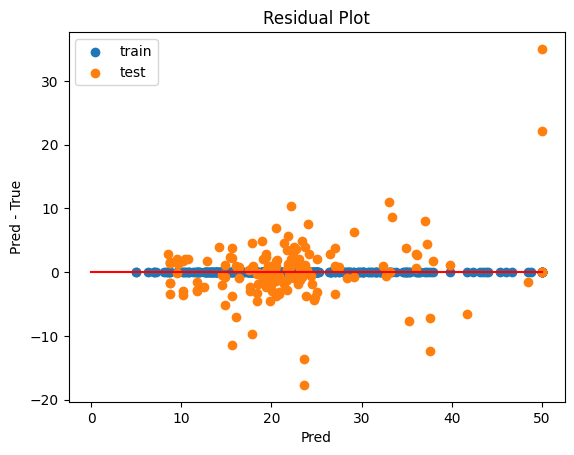

In [14]:
# 残差 Plot (決定木Model max_depth=20)
y_train_pred = tree_reg_depth_20.predict(X_train)
y_test_pred = tree_reg_depth_20.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [15]:
# Score 算出 (決定木Model max_depth=20)
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE: 0.0
    MSE: 0.0
    RMSE: 0.0
    R2: 1.0
Test Data Score
    MAE: 3.0914473684210524
    MSE: 26.663881578947368
    RMSE: 5.163708122942985
    R2: 0.6797727624015009


### Knock54: 最小 Sample数を変えてみよう
#### `min_samples_leaf=`
- Leaf-node の Sample数の最小値を指定する Parameter
- Default値は 1 = `max_depth=` などで深さを制限しない限り、Node の Sample数が 1 になるまで分岐を続ける。
- 値を変えることで最小 Sample数を調整することができる

In [16]:
# 決定木Model 構築 (max_depth=20, min_samples_leaf=5)
tree_reg_samples_5 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=0).fit(X_train, y_train)

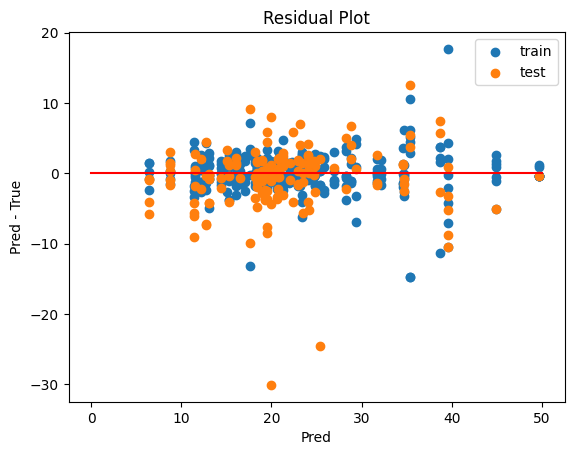

In [17]:
# 残差 Plot (max_depth=20, min_samples_leaf=5)
y_train_pred = tree_reg_samples_5.predict(X_train)
y_test_pred = tree_reg_samples_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [18]:
# Score算出 (max_depth=20, min_samples_leaf=5)
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE: 1.5989429199174965
    MSE: 7.050472435207605
    RMSE: 2.655272572676411
    R2: 0.9168228289576953
Test Data Score
    MAE: 3.104546261487051
    MSE: 23.502406639428433
    RMSE: 4.847928076965296
    R2: 0.7177413673707927


決定木は過学習に陥りやすい傾向はあるが、深さや最小Sample数などの Hyper Parameter を調整することで、過学習をある程度抑えることができ、Model の精度改善が期待できる。
※ 決定木の Hyper Parameter は他にもある。

### Knock55: Random-Forest Model を構築・評価しよう
#### Random-Forest
- 決定木を複数生成し、それぞれの結果を総合的に判断して学習を行なう Algorithm.
- 決定木の過学習に陥りやすい問題を解消するために、決定木で過学習が起きることを前提に異なる決定木Model を複数生成し、それぞれの結果の平均を取ることで予測精度は保ちつつ、過学習を抑制する仕組みをとっている。
- **Bagging** と呼ばれる Ensemble法の手法を使用している。
> #### Ensemble法
> 複数の Model を組み合わせて、高精度な Model を作る手法のこと。
> Model の精度向上が見込まれる一方、Model が複雑になり解釈が難しくなる。

In [19]:
# Random-Forest model 構築
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train, y_train)
# `n_estimators=` は 生成する決定木の数を指定する

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


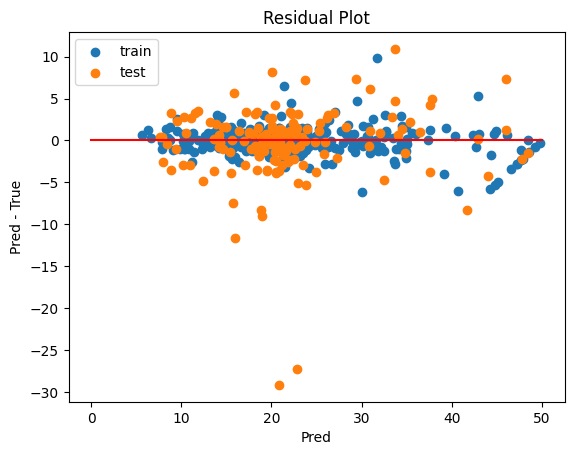

In [20]:
# 残差 Plot (Random-Forest)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [21]:
# Score 算出 (Random-Forest)
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print(('Test Data Score'))
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE: 0.9777401129943499
    MSE: 2.266378531073447
    RMSE: 1.5054496109380238
    R2: 0.9732626492113712
Test Data Score
    MAE: 2.6709868421052634
    MSE: 20.510911184210528
    RMSE: 4.528897347501986
    R2: 0.7536685568565598


### Knock56: Random-Forest の決定木の数を変えてみよう

In [22]:
# Random-Forest Model 構築 (n_estimators=3)
rf_change_param = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(X_train, y_train)

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


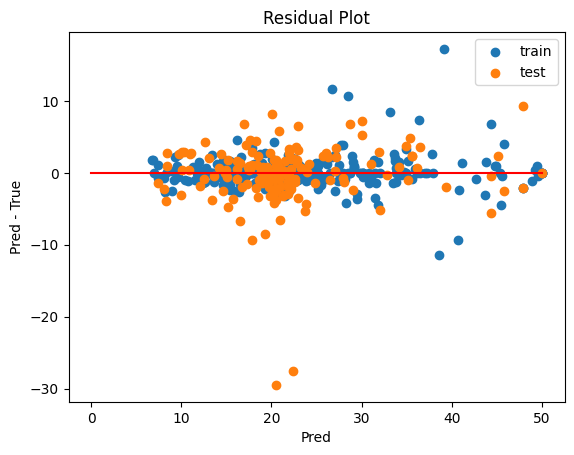

In [23]:
# 残差 Plot (Random-Forest Model n_estimators=3
y_train_pred = rf_change_param.predict(X_train)
y_test_pred = rf_change_param.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [24]:
# Score 算出 (Random-Forest Model n_estimators=3)
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE: 1.071468926553672
    MSE: 4.280938480853735
    RMSE: 2.069042890046926
    R2: 0.9494961003654969
Test Data Score
    MAE: 2.6666666666666665
    MSE: 19.84659356725146
    RMSE: 4.454951578552954
    R2: 0.7616468624433497


- 生成する決定木の数を増やした際の精度の向上は徐々に収束していくため、いたずらに数を増やせばそれだけ良い結果が得られる、というわけではない。
- 膨大な Data を使って Random-Forest の処理を行なう場合、処理時間や CPU への負荷は決定木の数や深さを増やすほど大きくなる。

### Knock57: 交差検証法で Model を評価しよう
#### Hold-out法の Demerit
訓練-data, Test-data の内容に偏りが生じる。
> **Hold-out法**
> Data-set をあらかじめ訓練用と Test用に分割し、訓練用-Data で学習させた Model を Test用 Data で評価する手法。

#### 交差検証法
Test-data を訓練-data を入れ替えて複数回学習・評価を行ない、それぞれの Score の平均値を取るなどして最終的な Model の評価を決定する手法

In [25]:
# 交差検証法 (Random-Forest Model)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf_cv = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
# n_splits= : Data の分割数を指定。
# shuffle= : True に指定することで、分割を行なう前に Data-set 内の Data の順番を Shuffle するように設定。

rf_scores = cross_val_score(estimator=rf_cv, X=X, y=y, cv=k_fold, scoring='r2')
# estimator= : 交差検証で使用する Model.
# X= : fit する Data (説明変数).
# y= : fit する Data (目的変数)
# cv= : 交差検証での Data-set の分割方法
# scoring= : 評価手法

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

In [26]:
# Score 算出 (Random-Forest Model 交差検証)
print(f"各分割の Score: {rf_scores}")
print(f"平均 Score: {np.mean(rf_scores)}")

各分割の Score: [0.74574193 0.85140316 0.73379121 0.66373528 0.86016952]
平均 Score: 0.7709682208769734


交差検証法では、評価の室が上がる一方で分割した数だけ学習・評価を行なうので、それだけ計算Cost がかかる。

### Knock58: 勾配-Boosting model を構築・評価しよう
#### 勾配-Boosting-決定木
- Random-Forest と同じく、Ensemble法を採用している Algorithm.
- Boosting と呼ばれる Ensemble法の手法が使用されている。
- 逐次的に決定木を生成する。具体的には、１つ前の決定木の誤りを修正して次の決定木を生成するということを繰り返し行なう。
- 近年、Competition で Deep-Learning と並んで頻繁に利用される Algorithm.
- 高い精度を誇る一方で、Hyper-Parameter設定の影響を受けやすく、調整に注意が必要な Algorithm でもある。
- 代表的なものに下記がある。
    - XgBoost
    - LightGBM


In [27]:
# XgBoost Model 構築 (交差検証)
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
xgb_scores = cross_val_score(xgb_reg, X, y, cv=k_fold, scoring='r2')

[15:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
# Score 算出 (XgBoost Model 交差検証)
print(f"各分割 Score: {xgb_scores}")
print(f"平均 Score: {np.mean(xgb_scores)}")

各分割 Score: [0.73631026 0.92311771 0.80855031 0.78204883 0.9189828 ]
平均 Score: 0.8338019804695092


### Knock59: Grid-Search で Hyper-parameter を tuning しよう

#### Grid-Search
あらかじめ Parameter の候補値を定義しておき、それら候補地の組み合わせを全通り検証し、最も良い評価結果を出した組み合わせがどれだったのかを探索する手法。

In [29]:
# XgBoost Model 構築準備 (Grid-Search)
xgb_reg_grid = xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {'booster': ['gbtree'],  # 木系Model か線形Model のどちらかを指定する。
                                    # gbtree もしくは dart と指定すると木系Model
                                    # gblinear と指定すると線形Model
          'n_estimators': [10, 30, 50, 100],  # 生成する決定木の数。XgBoost の場合は決定木の数を増やすほど Model が複雑になり過学習の Risk が高まる
          'max_depth': [2, 3, 4, 5, 6],  # 決定木の層の最大深さ
          'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],  # 学習率。以前の決定木の誤りをどれだけ強く補正するかを指定する。
                                                            # 補正を強くしすぎると Model が複雑になり、過学習の Risk が高まる。
          'colsample_bytree': [0.1, 0.25, 0.5, 0.75, 1.0],  # 各決定木で使用する説明変数の割合。１未満にすると、その割合だけ Random に選択された説明変数を使用する。
          'random_state': [0]
          }

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=xgb_reg_grid,  # 検証で使用する Model
                    param_grid=params,  # Parameter 名と値の一覧
                    cv=k_fold,  # cv 交差検証での Data-set 分割方法
                    scoring='r2'  # 評価手法
                    )

In [30]:
# XgBoost Model 構築(Grid Search)
grid.fit(X_train, y_train)

[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective=...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'learning_rate'

In [31]:
# Parameter, Score 算出 (Grid Search)
print(grid.best_params_)
print(grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}
0.893608656794969


In [32]:
# 精度評価 (Grid-Search)
y_test_pred = grid.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print('Test Data Score')
get_eval_score(y_test, y_test_pred)

Test Data Score
    MAE: 2.477970829135493
    MSE: 16.417754438506485
    RMSE: 4.051882826354494
    R2: 0.8028264513609131


### Knock60: Random-Search で Hyper-Parameter を tuning しよう
#### Random-Search
決められた候補値の Random な組み合わせを決められた回数だけ検証し、その限られた回数の中で最も良い評価を得た Parameter の組み合わせを探索する手法。
- Grid-Search の欠点である計算 Cost の高さを検証の回数を制限することで軽減する。
- Parameter の全組み合わせを検証するわけではない為、必ずしも最適な組み合わせを見つけることができない。

In [33]:
# XgBoost Model 構築準備 (Random-Search)
xgb_reg_random = xgb.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

params = {'booster': ['gbtree'],
          'n_estimators': [10, 30, 50, 100],
          'max_depth': [2, 3, 4, 5, 6],
          'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
          'colsample_bytree': [0.1, 0.25, 0.5, 0.75, 1.0],
          'random_state': [0]
          }

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
random = RandomizedSearchCV(estimator=xgb_reg_random,
                            param_distributions=params,
                            scoring='r2',
                            cv=k_fold,
                            n_iter=30,  # Random-Search の検証回数を指定
                            random_state=0)

In [34]:
# XgBoost Model 構築 (Random-Search)
random.fit(X_train, y_train)

[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          obje...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=30, n_jobs=None,
               

In [35]:
# Parameter, Score 算出 (Random-Search)
print(random.best_params_)
print(random.best_score_)

{'random_state': 0, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.25, 'colsample_bytree': 1.0, 'booster': 'gbtree'}
0.8775186564539581


In [36]:
# Score 算出 (Random-Search)
y_test_pred = random.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print('Test Data Score')
get_eval_score(y_test, y_test_pred)

Test Data Score
    MAE: 2.649204917957908
    MSE: 21.72137282803337
    RMSE: 4.660619360989843
    R2: 0.739131183996099


最終評価には Parameter tuning に関与していない Test data を使用しているので、Grid-Search よりも Random-Search の方が良い結果が出ることも十分に起こり得る。